In [2]:
#Exploratory Data Analysis - Show path's
 
import os
import sys
from pathlib import Path

sys.path.append(os.path.abspath(".."))

from config import DATASET_PATH

DATASET_PATH = Path(DATASET_PATH)  # This ensures DATASET_PATH is a Path object


normal_path = DATASET_PATH / "Normal"
stone_path = DATASET_PATH / "Stone"

print(f"normal_path : {normal_path}")
print(f"stone_path : {stone_path}")



normal_path : /Users/nic/Documents/Work/Ai\ Project's/MIT/Datasets/1-\ KideyStone/archive/Normal
stone_path : /Users/nic/Documents/Work/Ai\ Project's/MIT/Datasets/1-\ KideyStone/archive/Stone


normal_path : /Users/nic/Documents/Work/Ai Project's/MIT/Datasets/1- KideyStone/archive/Normal with 4414 files
stone_path : /Users/nic/Documents/Work/Ai Project's/MIT/Datasets/1- KideyStone/archive/Stone with 5002 files


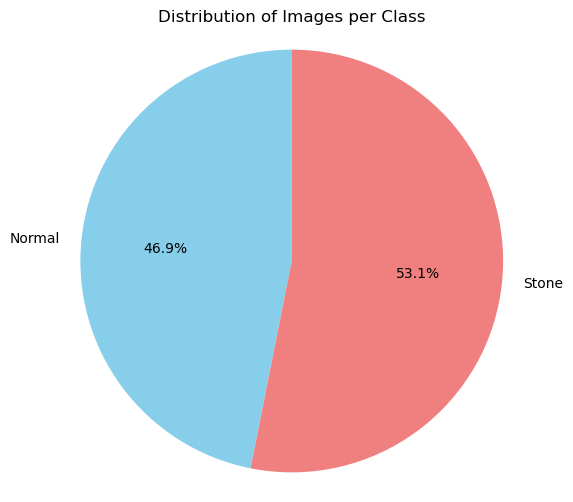

In [3]:

#Exploratory Data Analysis - show counts and draw pie chart from classifications

import matplotlib.pyplot as plt


# If normal_path and stone_path are Path objects:
if isinstance(normal_path, Path):
    normal_path = str(normal_path)
if isinstance(stone_path, Path):
    stone_path = str(stone_path)

# replace backslashes correctly (for string objects)
normal_path = normal_path.replace('\\', '')
stone_path = stone_path.replace('\\', '')

print(f"normal_path : {normal_path} with {len(os.listdir(normal_path))} files")
print(f"stone_path : {stone_path} with {len(os.listdir(stone_path))} files")

counts = [len(os.listdir(normal_path)), len(os.listdir(stone_path))]
labels = ['Normal', 'Stone']

plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Images per Class')
plt.axis('equal')
plt.show()

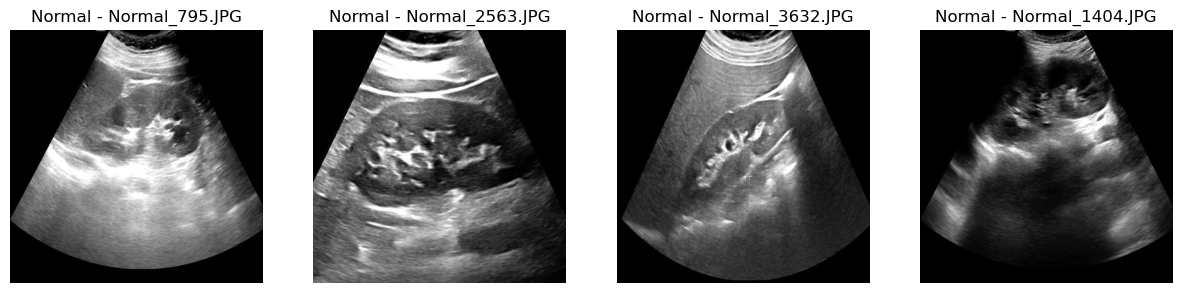

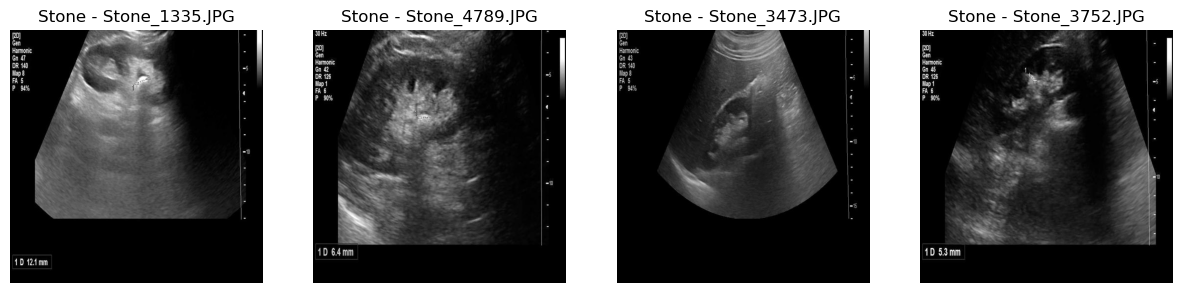

In [4]:
#Exploratory Data Analysis - just show samples of images. 

import random
import cv2

def show_sample_images(folder_path, label, n=4):
    files = random.sample(os.listdir(folder_path), n)
    fig, axes = plt.subplots(1, n, figsize=(15, n))
    for i, file in enumerate(files):
        img_path = os.path.join(folder_path, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f"{label} - {file}")
        axes[i].axis('off')
    plt.show()


show_sample_images(normal_path, 'Normal')
show_sample_images(stone_path, 'Stone')


In [6]:
img_shapes = []

for path in [normal_path, stone_path]:
    for img_file in os.listdir(path):
        img = cv2.imread(os.path.join(path, img_file), cv2.IMREAD_GRAYSCALE)
        img_shapes.append(img.shape)


# Check for unique image dimensions
unique_shapes = set(img_shapes)
print("Unique image shapes:", unique_shapes)


Unique image shapes: {(512, 512)}
